In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
#This census block's Total Pop was in error (Over 9000)
df = df[df['CENSUS BLOCK']!=8435001023]

In [15]:
X = df.drop(columns=['CENSUS BLOCK', 'closest_el',
                     'daily_rides_closest_el', 'best_shops_under_001', 
                     'block_lat', 'block_lon'])
X = StandardScaler().fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## DBscan method

In [16]:
def db_scan_search(eps_test, min_samp, X):
    db = DBSCAN(eps=eps_test, min_samples=min_samp).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    labels_, counts = np.unique(labels, return_counts=True)
    print(eps_test, min_samp)
    print(counts)
    print('x'*50)
    return db

### Seems to work best with eps between .2 and.3 and with min 10 or above

In [94]:
eps_test = np.linspace(.2,.3,20)
for x in eps_test:
    for y in range(7,15):
        db_scan_search(x,y)

0.2 7
[16636 16111  3228  7544  1085    20    12     9    97    17    26     7
    15    11    13   234    26    30     7     6     6    10    11    10
     7    52     7    11     7     8     7     8    12    10    18     7
     9     3     5     6     6     5     8     9     5     6     6    12
    12     6     7    14    12     7    26    11    14    28     7    31
    12    11     6     3     6     8     8    11     7     7     5     9
     7     7     7     8    10    16     7    12     5    23     9    10
     8    13     9    20     9    14     8     7     8    11    10     7
     7    78    10     6     7     8    10     8     9     4    11     5
     7     6     7     8     5    10    17    13     5     7    10     7
    12     7     5     4     6     7     5     8     6     7     7     8
     7     4     7     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2 8
[17748 15839  7355  3029   978    19    48    26    13    22    13   160
    17    11    13    10     9    1

0.2105263157894737 8
[16374 16246  3338  7699   265  1167    26   107    38     8    15    13
    17    14    15    27    14     7    11     8    92    10    12     7
     8    13    11    11     8    14     6     8     9     6    13    11
     7    12     8    22    17    16    46     8     8    10     8     7
     7     7     9     8    16    12     5    21    11    13     8    10
    10    13    12    14     9     7     8     8     9     7    81     9
     4     8     8     9     8     7     9     8     8    10    11    12
     8     8    11     7     8     8     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2105263157894737 9
[17254 16072  3200  7550   208  1088    82    25    11    13    18    17
     9    12     8    11    47    10    12    14    13    14     7     9
    21    27    12     8    10    10    15    13    21     8    13     7
     9     9     9     9     7    16    14     5    21     9     9    12
     9     9     7    12    76     8     9    15     9     9

0.2210526315789474 11
[17702  3157 15852  7534   173  1053    72    31    17     8     7    37
    11    11    10     8    17    26     7     9    11    10    18    14
    11    11    12    11     4    12    20    13   186     8    73    13
     7     9     7    11     5    10     9    18    11     6    11    11
     7]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2210526315789474 12
[18386  3050 15728  7381   128   973    22    13    22    11     7     9
    16    33    26    10    16    31    10    16    12    12    10    10
    12    19     4     9   187    11    13    42    30    10     9    13]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2210526315789474 13
[19026 15502  7234  2929   921   105    17    11    26    31     6    18
    13    13    14     7    10    12    18   150    12    10    31    40
    27    11    37    13    10     8    10     6    13]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2210526315789474 14
[19640 15261  7110  2514   867    17 

0.2368421052631579 8
[13689 16886  1525  3925  8402   654    28   268    13     8    21    12
     5     8     8    19     8    12     8    10    26    12    11     8
     8    14     8    97     8    15    12    10    26    42    18    17
     6     7     5     8    15    35    15    14    13     9     6    10
     9     8     8    10     8   111     8     8    13     7    10     9
     8     8     9     8     9     7     8     3     6     9     8     7
     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2368421052631579 9
[14562 16680  3800  8240  1468   586   192     6    13    14    22     7
    12    19    18    15    14    29    88    12    24     8    26    43
    21    16    22    17     7     6     9    36    14     7    10    10
     9     9    11    98     7     8    11    10    13     9     9     9
     6     9]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.2368421052631579 10
[15224 16544  3687  8133  1401   439   157    12    18    41    10    12
     8   

0.25263157894736843 7
[11825 17315  1950  4280  8728   845   182   391    12    12     8    11
     9     9    10    11     7     5     7    19     9    10     8     6
     8    11     7     8    24     7     7     4    36     8     8    11
     7     9     3     6    11    10     7    17     7     9     7     7
     3     9    17     7    29    10     8    14   121     8    12     7
     6     9     9     7     9     6     7     7     7     7     7     8
     5     6     7     8     7     9     7]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.25263157894736843 8
[12500 17176  1852  4180  8611   787   348    13    13     2    24     5
     9    14    10     6     7    18     8     8     8    50   123     8
     6    23    35     8    18    10     8    10    10    16    14    13
     8    14    10     8     8    14   121     8     8     3    12     7
     8    10     6     8     7     9    13     8     6     6     6     8
     8     8     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

0.26842105263157895 8
[11514 17559  2018  4354  8829   882   419   217    15     7     9    10
     8     8    11     7     6    11     9     8     5     5     6     9
    23    46    11     8     7     8     8    17     8     8     8    17
     8    37    10     8     8    13    17     9     6    10     7    10
     5     4     5     8     8     6     9     8]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.26842105263157895 9
[12093 17451  1924  4291  8722   852   396    13    10   193    10     8
     6    11     4     6     9     9     6     4     6    20    43     9
     6     9    17    16    18     6    24     6    10    14    11     9
    10     9     9     5     7     9]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.26842105263157895 10
[12774 17318  1872  4207  8603   806   352     8    13    10     6   170
    19    37    19    13    18    16    11    10     9]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.26842105263157895 11
[13294 17069  1710  4090  852

0.28421052631578947 10
[11834 17540  1997  4339  8799   857   416   208     9    10     7    12
     9    10    21    48    22    10    10    19    10     8    22    15
    16     9    12    10     6     6]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.28421052631578947 11
[12302 17325  1944  4270  8692   828   391     9     5    12   187    18
    44    23    13    17     8    11    19    10   120    11    10    11
    11]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.28421052631578947 12
[12772 17203  1858  4204  8622   782   364    13    23     6    12   178
    39    18    21    15    18    10    16   117]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.28421052631578947 13
[13183 17102  1665  4132  8554   746   311    13    23     9    31    63
   166    39    18    14     7    14    16   106     9    16    12    16
    17     9]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
0.28421052631578947 14
[13625 17026  1593  4035  8513   706   275    13    24    23

### dbscan .3 and 11

In [18]:
# db = DBSCAN(eps=.3, min_samples=11).fit(X)
db = db_scan_search(.3,11,X)

0.3 11
[12101 17364  1953  4318  8760   851   397    10     7    12   216    49
    22    11    18     9    11    22   119    12    11    10     7]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [19]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]

In [20]:
df['db_labels']=db.labels_

In [21]:
df.to_csv('data/df_dblabels.csv')

In [22]:
with open('data/db_point3_11.p','wb') as write_file:
    pickle.dump(db,write_file)

In [23]:
X = df.drop(columns=['CENSUS BLOCK', 'closest_el',
                     'daily_rides_closest_el', 'best_shops_under_001', 
                     'block_lat', 'block_lon'])
X = StandardScaler().fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 2.5, 30 

In [35]:
db = db_scan_search(2.5,30,X)

2.5 30
[  310 44727   942   141   170]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


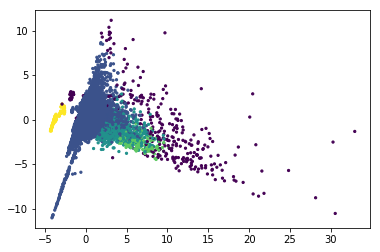

In [36]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]
plt.scatter(pca_one, pca_two, c=db.labels_, s=5)

In [38]:
df_2p5_30 = df
df_2p5_30['db_labels'] = db.labels_

In [39]:
df_2p5_30.describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,4.629000e+04,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000
mean,4.548850e+09,58.021171,2.312249,0.035774,0.034059,4051.292393,0.003003,41.844793,-87.682342,1.717455,0.014117,0.030763
std,2.781070e+09,79.482745,6.506651,0.239121,0.027129,3288.030896,0.056273,0.097816,0.064820,3.315206,0.007948,0.267093
min,1.010010e+08,0.000000,0.000000,0.000000,0.000101,337.524862,0.000000,41.644696,-87.937381,0.000000,0.000055,-1.000000
25%,1.911003e+09,9.000000,0.000000,0.000000,0.014658,1384.259708,0.000000,41.761470,-87.724668,0.000000,0.009049,0.000000
50%,4.906001e+09,42.000000,0.000000,0.000000,0.026464,3272.478661,0.000000,41.851298,-87.679888,1.000000,0.013403,0.000000
75%,7.005014e+09,77.000000,2.000000,0.000000,0.045528,5428.548635,0.000000,41.930471,-87.639157,2.000000,0.018051,0.000000
max,9.801001e+09,1590.000000,237.000000,6.000000,0.173106,13972.553730,2.000000,42.023024,-87.524730,143.000000,0.149844,3.000000


In [43]:
df_2p5_30[df_2p5_30.db_labels==3].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,1.700000e+02,170.000000,170.000000,170.0,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.0
mean,5.595826e+09,22.917647,0.176471,0.0,0.141757,10126.668064,0.0,41.669247,-87.556774,0.405882,0.015238,3.0
std,5.524609e+08,20.276615,0.453167,0.0,0.024644,1928.642872,0.0,0.030511,0.057782,0.749730,0.005758,0.0
min,4.313011e+09,0.000000,0.000000,0.0,0.074025,1384.259708,0.0,41.646142,-87.792523,0.000000,0.002583,3.0
25%,5.501001e+09,0.000000,0.000000,0.0,0.124561,10624.839242,0.0,41.651079,-87.544088,0.000000,0.011031,3.0
50%,5.501001e+09,24.000000,0.000000,0.0,0.152733,10624.839242,0.0,41.654685,-87.538506,0.000000,0.014744,3.0
75%,5.501003e+09,38.750000,0.000000,0.0,0.159081,10624.839242,0.0,41.682673,-87.532113,1.000000,0.020241,3.0
max,7.505003e+09,74.000000,2.000000,0.0,0.166921,10624.839242,0.0,41.777850,-87.524910,3.000000,0.027622,3.0


In [42]:
df_2p5_30[df_2p5_30.db_labels==2].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,1.410000e+02,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0
mean,3.380081e+09,42.333333,19.609929,2.0,0.011444,4334.806305,0.177305,41.907903,-87.655057,3.836879,0.011418,2.0
std,3.130107e+09,58.872582,11.977821,0.0,0.009847,2666.188487,0.401492,0.041087,0.024929,3.661819,0.005046,0.0
min,1.040010e+08,0.000000,0.000000,2.0,0.000135,714.328985,0.000000,41.794141,-87.720107,0.000000,0.000314,2.0
25%,7.130010e+08,0.000000,11.000000,2.0,0.003839,2239.334919,0.000000,41.884279,-87.671686,1.000000,0.008160,2.0
50%,2.414003e+09,12.000000,20.000000,2.0,0.008852,4449.553645,0.000000,41.897141,-87.652717,3.000000,0.011360,2.0
75%,8.309002e+09,69.000000,28.000000,2.0,0.015071,5363.154460,0.000000,41.938126,-87.634792,6.000000,0.015407,2.0
max,8.410001e+09,299.000000,48.000000,2.0,0.039389,13972.553730,2.000000,42.008624,-87.598762,17.000000,0.024149,2.0


In [41]:
df_2p5_30[df_2p5_30.db_labels==1].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,9.420000e+02,942.000000,942.000000,942.0,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.0
mean,3.329515e+09,49.822718,13.529724,1.0,0.017157,3797.187739,0.085987,41.905908,-87.672474,3.532909,0.011564,1.0
std,2.971929e+09,74.780283,11.193338,0.0,0.015117,2321.706292,0.280494,0.060285,0.044171,4.157944,0.005587,0.0
min,1.020120e+08,0.000000,0.000000,1.0,0.000414,337.524862,0.000000,41.685685,-87.817285,0.000000,0.000393,1.0
25%,8.150020e+08,0.000000,6.000000,1.0,0.006577,1834.829328,0.000000,41.879976,-87.696126,1.000000,0.007384,1.0
50%,2.405001e+09,24.000000,11.000000,1.0,0.012428,4018.870379,0.000000,41.910326,-87.666746,2.000000,0.011486,1.0
75%,5.702501e+09,70.000000,19.000000,1.0,0.023021,5034.332208,0.000000,41.949714,-87.642112,5.000000,0.015600,1.0
max,9.801001e+09,500.000000,61.000000,1.0,0.080315,13972.553730,1.000000,42.019262,-87.551941,24.000000,0.029228,1.0


In [40]:
df_2p5_30[df_2p5_30.db_labels==0].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,4.472700e+04,44727.000000,44727.000000,44727.0,44727.000000,44727.000000,44727.0,44727.000000,44727.000000,44727.000000,44727.000000,44727.0
mean,4.581178e+09,57.305744,1.766316,0.0,0.034240,4020.760877,0.0,41.843677,-87.683378,1.563418,0.014202,0.0
std,2.769430e+09,72.779586,4.139805,0.0,0.026410,3289.549154,0.0,0.097890,0.064879,2.521516,0.008003,0.0
min,1.010010e+08,0.000000,0.000000,0.0,0.000209,337.524862,0.0,41.644696,-87.937381,0.000000,0.000055,0.0
25%,1.913021e+09,10.000000,0.000000,0.0,0.015167,1384.259708,0.0,41.760041,-87.725955,0.000000,0.009107,0.0
50%,4.909011e+09,43.000000,0.000000,0.0,0.026932,3272.478661,0.0,41.846699,-87.681289,1.000000,0.013476,0.0
75%,7.005016e+09,77.000000,1.000000,0.0,0.045993,5428.548635,0.0,41.930299,-87.640154,2.000000,0.018139,0.0
max,9.801001e+09,1194.000000,64.000000,0.0,0.173106,13972.553730,0.0,42.023024,-87.524730,38.000000,0.149844,0.0


In [44]:
df_2p5_30.to_csv('data/df_2p5_30_use1.csv')

## DBA 2.5 samp 15

In [51]:
db = db_scan_search(2.5,15,X)

2.5 15
[  202 44746   970   146    25   201]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [54]:
df_2p5_15 = df
df_2p5_15['db_labels'] = db.labels_

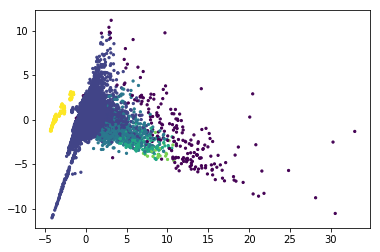

In [55]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]
plt.scatter(pca_one, pca_two, c=db.labels_, s=5)

In [56]:
df_2p5_15.to_csv('data/df_2p5_15.csv')

### DBA EPS 2 Min Samples 30

In [25]:
# db = DBSCAN(eps=.3, min_samples=11).fit(X)
db = db_scan_search(2,30,X)

2 30
[  424 44667   912   126   161]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [134]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]


array([-0.20021382, -0.36877103,  0.06896375, ..., -1.17750502,
       -1.4055011 ,  3.05870156])

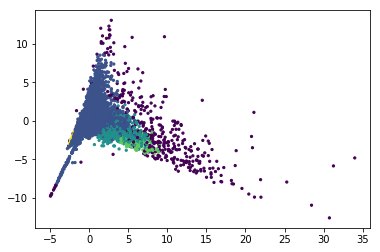

In [26]:
plt.scatter(pca_one, pca_two, c=db.labels_, s=5)

In [28]:
df_2_30 = df
df_2_30['db_labels'] = db.labels_

In [29]:
df_2_30.describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,4.629000e+04,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000
mean,4.548850e+09,58.021171,2.312249,0.035774,0.034059,4051.292393,0.003003,41.844793,-87.682342,1.717455,0.014117,0.026420
std,2.781070e+09,79.482745,6.506651,0.239121,0.027129,3288.030896,0.056273,0.097816,0.064820,3.315206,0.007948,0.265246
min,1.010010e+08,0.000000,0.000000,0.000000,0.000101,337.524862,0.000000,41.644696,-87.937381,0.000000,0.000055,-1.000000
25%,1.911003e+09,9.000000,0.000000,0.000000,0.014658,1384.259708,0.000000,41.761470,-87.724668,0.000000,0.009049,0.000000
50%,4.906001e+09,42.000000,0.000000,0.000000,0.026464,3272.478661,0.000000,41.851298,-87.679888,1.000000,0.013403,0.000000
75%,7.005014e+09,77.000000,2.000000,0.000000,0.045528,5428.548635,0.000000,41.930471,-87.639157,2.000000,0.018051,0.000000
max,9.801001e+09,1590.000000,237.000000,6.000000,0.173106,13972.553730,2.000000,42.023024,-87.524730,143.000000,0.149844,3.000000


In [34]:
df_2_30[df_2_30.db_labels==3].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,1.610000e+02,161.000000,161.000000,161.0,161.000000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.0
mean,5.590387e+09,23.596273,0.180124,0.0,0.145341,10399.500866,0.0,41.665259,-87.553399,0.260870,0.015270,3.0
std,4.768776e+08,20.451888,0.459459,0.0,0.019922,1416.145693,0.0,0.025720,0.054788,0.440479,0.005913,0.0
min,5.201001e+09,0.000000,0.000000,0.0,0.097245,1554.969637,0.0,41.646142,-87.792523,0.000000,0.002583,3.0
25%,5.501001e+09,0.000000,0.000000,0.0,0.128029,10624.839242,0.0,41.651037,-87.543193,0.000000,0.010994,3.0
50%,5.501001e+09,25.000000,0.000000,0.0,0.153652,10624.839242,0.0,41.654500,-87.538416,0.000000,0.014526,3.0
75%,5.501003e+09,39.000000,0.000000,0.0,0.159644,10624.839242,0.0,41.662543,-87.531569,1.000000,0.020687,3.0
max,7.403003e+09,74.000000,2.000000,0.0,0.166921,10624.839242,0.0,41.777850,-87.524910,1.000000,0.027622,3.0


In [31]:
df_2_30[df_2_30.db_labels==1].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,9.120000e+02,912.000000,912.000000,912.0,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.0
mean,3.292189e+09,47.014254,12.941886,1.0,0.017528,3740.257919,0.086623,41.906282,-87.673647,3.221491,0.011613,1.0
std,2.942895e+09,65.075274,10.304684,0.0,0.015186,2295.517198,0.281436,0.060702,0.044328,3.541081,0.005592,0.0
min,1.020120e+08,0.000000,0.000000,1.0,0.000414,337.524862,0.000000,41.685685,-87.817285,0.000000,0.000393,1.0
25%,8.150018e+08,0.000000,5.000000,1.0,0.006936,1834.829328,0.000000,41.880058,-87.696962,1.000000,0.007435,1.0
50%,2.403001e+09,24.000000,10.000000,1.0,0.012798,3845.434789,0.000000,41.910933,-87.668150,2.000000,0.011507,1.0
75%,4.610001e+09,69.250000,18.000000,1.0,0.023725,5034.332208,0.000000,41.952903,-87.646390,4.000000,0.015664,1.0
max,9.801001e+09,455.000000,55.000000,1.0,0.080315,13972.553730,1.000000,42.019262,-87.551941,20.000000,0.029228,1.0


In [32]:
df_2_30[df_2_30.db_labels==0].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,4.466700e+04,44667.000000,44667.000000,44667.0,44667.000000,44667.000000,44667.0,44667.000000,44667.000000,44667.000000,44667.000000,44667.0
mean,4.581265e+09,56.988806,1.740368,0.0,0.034250,4019.975754,0.0,41.843589,-87.683351,1.549757,0.014175,0.0
std,2.767938e+09,70.813316,3.987527,0.0,0.026400,3290.202267,0.0,0.097896,0.064778,2.454649,0.007767,0.0
min,1.010010e+08,0.000000,0.000000,0.0,0.000209,337.524862,0.0,41.644696,-87.921381,0.000000,0.000055,0.0
25%,1.913021e+09,10.000000,0.000000,0.0,0.015190,1384.259708,0.0,41.759974,-87.725926,0.000000,0.009109,0.0
50%,4.909011e+09,43.000000,0.000000,0.0,0.026945,3272.478661,0.0,41.846480,-87.681309,1.000000,0.013477,0.0
75%,7.005016e+09,77.000000,1.000000,0.0,0.045995,5428.548635,0.0,41.930292,-87.640206,2.000000,0.018139,0.0
max,9.801001e+09,1021.000000,55.000000,0.0,0.173106,13972.553730,0.0,42.023024,-87.524730,34.000000,0.131298,0.0


In [33]:
df_2_30.to_csv('data/df_2_30_use_2.csv')

### DBA EPS Eps 1.5 Samples 25

In [204]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
#This census block's Total Pop was in error (Over 9000)
df = df[df['CENSUS BLOCK']!=8435001023]

X = df.drop(columns=['CENSUS BLOCK', 'closest_el',
                     'daily_rides_closest_el', 'best_shops_under_001', 
                     'block_lat', 'block_lon'])
X = StandardScaler().fit_transform(X)
db = db_scan_search(1.5,25,X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


1.5 25
[  547 44762   858   108    15]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [205]:
# with open('../dataframes/df_with_libs.p', 'rb') as read_file:
#     df = pickle.load(read_file)
# #This census block's Total Pop was in error (Over 9000)
# df = df[df['CENSUS BLOCK']!=8435001023]
df_1p5_25 = df
df_1p5_25['db_labels'] = db.labels_
df_1p5_25['pca_one'] = pca_one
df_1p5_25['pca_two'] = pca_two


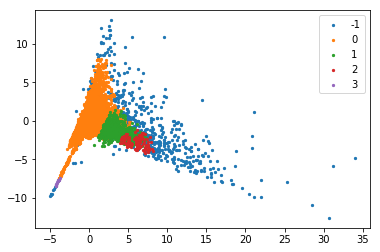

In [206]:
for dblabel in np.unique(db.labels_):
    df = df_1p5_25[df_1p5_25.db_labels == dblabel]
    df_pca_one = df.pca_one
    df_pca_two = df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel)
plt.legend()


In [207]:
df_1p5_25.describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,4.629000e+04,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,4.629000e+04,4.629000e+04
mean,4.548850e+09,58.021171,2.312249,0.035774,0.034059,4051.292393,0.003003,41.844793,-87.682342,1.717455,0.014117,0.012357,5.821704e-16,-3.130018e-16
std,2.781070e+09,79.482745,6.506651,0.239121,0.027129,3288.030896,0.056273,0.097816,0.064820,3.315206,0.007948,0.206032,1.370433e+00,1.072887e+00
min,1.010010e+08,0.000000,0.000000,0.000000,0.000101,337.524862,0.000000,41.644696,-87.937381,0.000000,0.000055,-1.000000,-4.956021e+00,-1.259332e+01
25%,1.911003e+09,9.000000,0.000000,0.000000,0.014658,1384.259708,0.000000,41.761470,-87.724668,0.000000,0.009049,0.000000,-5.883110e-01,-5.398877e-01
50%,4.906001e+09,42.000000,0.000000,0.000000,0.026464,3272.478661,0.000000,41.851298,-87.679888,1.000000,0.013403,0.000000,-2.080571e-01,8.601545e-03
75%,7.005014e+09,77.000000,2.000000,0.000000,0.045528,5428.548635,0.000000,41.930471,-87.639157,2.000000,0.018051,0.000000,2.157300e-01,5.361240e-01
max,9.801001e+09,1590.000000,237.000000,6.000000,0.173106,13972.553730,2.000000,42.023024,-87.524730,143.000000,0.149844,3.000000,3.398984e+01,1.302869e+01


In [161]:
df_1p5_25[df_1p5_25.db_labels==3].describe()

#very far from the EL

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.500000e+01,15.000000,15.0,15.0,15.000000,1.500000e+01,15.0,15.000000,15.000000,15.0,15.000000,15.0,15.000000,15.000000
mean,9.102008e+09,0.066667,0.0,0.0,0.075166,4.648652e+03,0.0,42.003098,-87.914963,0.0,0.126891,3.0,-4.079206,-7.999428
std,1.021757e+09,0.258199,0.0,0.0,0.004202,9.414165e-13,0.0,0.003926,0.006538,0.0,0.004202,0.0,0.160559,0.324797
min,7.706022e+09,0.000000,0.0,0.0,0.067661,4.648652e+03,0.0,41.994751,-87.926244,0.0,0.119386,3.0,-4.292543,-8.431110
25%,7.706023e+09,0.000000,0.0,0.0,0.071461,4.648652e+03,0.0,42.001168,-87.920130,0.0,0.123186,3.0,-4.221526,-8.287527
50%,9.800001e+09,0.000000,0.0,0.0,0.074490,4.648652e+03,0.0,42.003154,-87.913113,0.0,0.126215,3.0,-4.053462,-7.947733
75%,9.800001e+09,0.000000,0.0,0.0,0.078890,4.648652e+03,0.0,42.005517,-87.909261,0.0,0.130615,3.0,-3.937789,-7.713864
max,9.800001e+09,1.000000,0.0,0.0,0.080749,4.648652e+03,0.0,42.009013,-87.905552,0.0,0.132474,3.0,-3.792625,-7.420369


In [160]:
df_1p5_25[df_1p5_25.db_labels==2].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.080000e+02,108.000000,108.00000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.0,108.000000,108.000000
mean,3.428522e+09,40.277778,17.25000,2.0,0.011441,4224.388818,0.157407,41.909694,-87.658715,2.620370,0.011548,2.0,5.960522,-2.793857
std,3.146338e+09,47.262803,9.37697,0.0,0.009645,2885.451479,0.365882,0.041423,0.025022,2.232795,0.004784,0.0,1.060709,0.658217
min,1.040010e+08,0.000000,0.00000,2.0,0.000135,714.328985,0.000000,41.794141,-87.720107,0.000000,0.000314,2.0,3.923679,-4.203158
25%,6.847510e+08,0.000000,10.75000,2.0,0.003850,2075.786106,0.000000,41.884322,-87.672322,1.000000,0.008640,2.0,5.046723,-3.303973
50%,2.414502e+09,23.500000,18.50000,2.0,0.008849,4131.272058,0.000000,41.902687,-87.661041,2.000000,0.011495,2.0,6.089812,-2.826084
75%,8.311253e+09,69.750000,23.00000,2.0,0.015196,5034.332208,0.000000,41.939103,-87.637099,4.000000,0.015519,2.0,6.697480,-2.328556
max,8.410001e+09,186.000000,36.00000,2.0,0.039389,13972.553730,1.000000,42.005093,-87.612723,9.000000,0.020412,2.0,8.131413,-1.207371


In [159]:
df_1p5_25[df_1p5_25.db_labels==1].describe()
# high bus, med high coffee, close to el

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,8.580000e+02,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000
mean,3.298075e+09,42.988345,12.093240,1.0,0.017639,3652.657205,0.089744,41.907314,-87.675376,2.821678,0.011683,1.0,3.327119,-1.371003
std,2.936751e+09,55.710871,9.513519,0.0,0.014974,2273.213660,0.285981,0.060149,0.043904,2.931286,0.005492,0.0,1.150271,0.755022
min,1.020120e+08,0.000000,0.000000,1.0,0.000414,337.524862,0.000000,41.685685,-87.816234,0.000000,0.000393,1.0,0.667578,-3.330157
25%,8.170010e+08,0.000000,5.000000,1.0,0.007089,1834.829328,0.000000,41.880016,-87.699462,1.000000,0.007676,1.0,2.502936,-1.856588
50%,2.402501e+09,23.500000,10.000000,1.0,0.013038,3560.691691,0.000000,41.915481,-87.668897,2.000000,0.011605,1.0,3.119636,-1.414694
75%,4.608753e+09,67.750000,17.000000,1.0,0.024140,5034.332208,0.000000,41.953392,-87.648377,4.000000,0.015666,1.0,3.945063,-0.952284
max,9.801001e+09,315.000000,47.000000,1.0,0.080315,13972.553730,1.000000,42.019262,-87.551941,15.000000,0.029228,1.0,7.316135,1.427674


In [116]:
df_1p5_25[df_1p5_25.db_labels==0].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels
count,4.476200e+04,44762.000000,44762.000000,44762.0,44762.000000,44762.000000,44762.0,44762.000000,44762.000000,44762.000000,44762.000000,44762.0
mean,4.585450e+09,56.369398,1.709642,0.0,0.034655,4041.380342,0.0,41.842854,-87.682880,1.522363,0.014142,0.0
std,2.762698e+09,68.438191,3.869568,0.0,0.027183,3308.334026,0.0,0.098306,0.065059,2.349037,0.007506,0.0
min,1.010010e+08,0.000000,0.000000,0.0,0.000209,337.524862,0.0,41.644696,-87.918870,0.000000,0.000055,0.0
25%,2.001001e+09,10.000000,0.000000,0.0,0.015247,1384.259708,0.0,41.758995,-87.725808,0.000000,0.009117,0.0
50%,4.909021e+09,42.000000,0.000000,0.0,0.027067,3272.478661,0.0,41.845277,-87.681130,1.000000,0.013481,0.0
75%,7.005014e+09,77.000000,1.000000,0.0,0.046281,5428.548635,0.0,41.929947,-87.639893,2.000000,0.018138,0.0
max,9.801001e+09,933.000000,48.000000,0.0,0.173106,13972.553730,0.0,42.023024,-87.524730,28.000000,0.116151,0.0


### DBA EPS .3 Eps 25

In [165]:
db = db_scan_search(.3,25)

0.3 25
[17416  3333 16006  7814   219  1146    28    52    27   161    30    39
    19]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


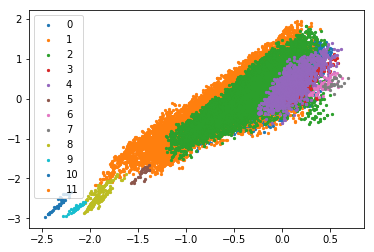

In [168]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
#This census block's Total Pop was in error (Over 9000)
df = df[df['CENSUS BLOCK']!=8435001023]
df_p3_25 = df
df_p3_25['db_labels'] = db.labels_
df_p3_25['pca_one'] = pca_one
df_p3_25['pca_two'] = pca_two


labels = np.unique(db.labels_)

for dblabel in np.unique(labels[1:]):
    df = df_p3_25[df_p3_25.db_labels == dblabel]
    df_pca_one = df.pca_one
    df_pca_two = df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel)
plt.legend()

In [169]:
df_p3_25.describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,4.629000e+04,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,46290.000000,4.629000e+04,4.629000e+04
mean,4.548850e+09,58.021171,2.312249,0.035774,0.034059,4051.292393,0.003003,41.844793,-87.682342,1.717455,0.014117,0.480817,5.821704e-16,-3.130018e-16
std,2.781070e+09,79.482745,6.506651,0.239121,0.027129,3288.030896,0.056273,0.097816,0.064820,3.315206,0.007948,1.448426,1.370433e+00,1.072887e+00
min,1.010010e+08,0.000000,0.000000,0.000000,0.000101,337.524862,0.000000,41.644696,-87.937381,0.000000,0.000055,-1.000000,-4.956021e+00,-1.259332e+01
25%,1.911003e+09,9.000000,0.000000,0.000000,0.014658,1384.259708,0.000000,41.761470,-87.724668,0.000000,0.009049,-1.000000,-5.883110e-01,-5.398877e-01
50%,4.906001e+09,42.000000,0.000000,0.000000,0.026464,3272.478661,0.000000,41.851298,-87.679888,1.000000,0.013403,1.000000,-2.080571e-01,8.601545e-03
75%,7.005014e+09,77.000000,2.000000,0.000000,0.045528,5428.548635,0.000000,41.930471,-87.639157,2.000000,0.018051,1.000000,2.157300e-01,5.361240e-01
max,9.801001e+09,1590.000000,237.000000,6.000000,0.173106,13972.553730,2.000000,42.023024,-87.524730,143.000000,0.149844,11.000000,3.398984e+01,1.302869e+01


In [182]:
df_p3_25[df_p3_25.db_labels==11].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.900000e+01,19.000000,19.000000,19.0,19.000000,1.900000e+01,19.0,19.000000,19.000000,19.0,19.000000,19.0,19.000000,19.000000
mean,5.653896e+09,27.368421,0.210526,0.0,0.131619,1.062484e+04,0.0,41.660479,-87.554621,0.0,0.008243,11.0,-1.566688,-1.186884
std,6.620940e+08,8.287947,0.418854,0.0,0.001410,3.737668e-12,0.0,0.001955,0.001708,0.0,0.001073,0.0,0.035079,0.120215
min,5.502001e+09,10.000000,0.000000,0.0,0.129576,1.062484e+04,0.0,41.656679,-87.557503,0.0,0.006377,11.0,-1.623547,-1.424106
25%,5.502001e+09,22.000000,0.000000,0.0,0.130470,1.062484e+04,0.0,41.659431,-87.555895,0.0,0.007351,11.0,-1.584264,-1.269776
50%,5.502001e+09,27.000000,0.000000,0.0,0.131588,1.062484e+04,0.0,41.660584,-87.555024,0.0,0.008358,11.0,-1.573801,-1.182618
75%,5.502002e+09,33.500000,0.000000,0.0,0.132631,1.062484e+04,0.0,41.662018,-87.553209,0.0,0.009056,11.0,-1.539426,-1.120118
max,8.388002e+09,43.000000,1.000000,0.0,0.134747,1.062484e+04,0.0,41.664395,-87.551683,0.0,0.009723,11.0,-1.499344,-0.973761


In [181]:
df_p3_25[df_p3_25.db_labels==10].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,3.900000e+01,39.000000,39.0,39.0,39.000000,3.900000e+01,39.0,39.000000,39.000000,39.0,39.000000,39.0,39.000000,39.000000
mean,5.501001e+09,7.487179,0.0,0.0,0.161161,1.062484e+04,0.0,41.653774,-87.531784,0.0,0.022097,10.0,-2.329405,-2.641772
std,4.332907e+02,11.433726,0.0,0.0,0.001815,5.528304e-12,0.0,0.003491,0.003437,0.0,0.001620,0.0,0.065844,0.167752
min,5.501001e+09,0.000000,0.0,0.0,0.156391,1.062484e+04,0.0,41.647214,-87.539015,0.0,0.018900,10.0,-2.469301,-2.962228
25%,5.501001e+09,0.000000,0.0,0.0,0.159989,1.062484e+04,0.0,41.650886,-87.534250,0.0,0.020968,10.0,-2.370866,-2.751916
50%,5.501001e+09,0.000000,0.0,0.0,0.161090,1.062484e+04,0.0,41.653553,-87.530554,0.0,0.021830,10.0,-2.326964,-2.653944
75%,5.501002e+09,13.000000,0.0,0.0,0.162593,1.062484e+04,0.0,41.655937,-87.529478,0.0,0.023391,10.0,-2.283247,-2.517995
max,5.501002e+09,35.000000,0.0,0.0,0.164702,1.062484e+04,0.0,41.662629,-87.525080,0.0,0.025404,10.0,-2.203581,-2.350569


In [180]:
df_p3_25[df_p3_25.db_labels==9].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,3.000000e+01,30.0,30.0,30.0,30.000000,30.000000,30.0,30.000000,30.000000,30.0,30.000000,30.0,30.000000,30.000000
mean,5.495203e+09,0.0,0.0,0.0,0.124429,10624.839242,0.0,41.651182,-87.571108,0.0,0.031348,9.0,-2.148004,-2.743931
std,2.560467e+07,0.0,0.0,0.0,0.003993,0.000000,0.0,0.008182,0.009272,0.0,0.001316,0.0,0.056779,0.097742
min,5.401014e+09,0.0,0.0,0.0,0.119637,10624.839242,0.0,41.645335,-87.579205,0.0,0.028971,9.0,-2.284725,-2.945360
25%,5.502002e+09,0.0,0.0,0.0,0.121316,10624.839242,0.0,41.647845,-87.575622,0.0,0.030470,9.0,-2.175260,-2.802204
50%,5.502002e+09,0.0,0.0,0.0,0.122811,10624.839242,0.0,41.649694,-87.573795,0.0,0.031360,9.0,-2.150561,-2.744974
75%,5.502002e+09,0.0,0.0,0.0,0.127405,10624.839242,0.0,41.651156,-87.569329,0.0,0.032502,9.0,-2.106862,-2.676374
max,5.502002e+09,0.0,0.0,0.0,0.133929,10624.839242,0.0,41.681966,-87.538052,0.0,0.033668,9.0,-2.052423,-2.581688


In [179]:
df_p3_25[df_p3_25.db_labels==8].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.610000e+02,161.000000,161.000000,161.0,161.000000,161.000000,161.0,161.000000,161.000000,161.0,161.000000,161.0,161.000000,161.000000
mean,7.692581e+09,0.540373,0.049689,0.0,0.107770,10220.631349,0.0,41.681471,-87.578899,0.0,0.029856,8.0,-1.905841,-2.403955
std,1.201716e+09,3.016608,0.217981,0.0,0.008326,1693.716975,0.0,0.024292,0.054930,0.0,0.004818,0.0,0.087728,0.223966
min,4.601001e+09,0.000000,0.000000,0.0,0.092074,1384.259708,0.0,41.645254,-87.799919,0.0,0.019893,8.0,-2.061243,-2.862603
25%,7.402001e+09,0.000000,0.000000,0.0,0.101531,10624.839242,0.0,41.672960,-87.570046,0.0,0.025832,8.0,-1.972446,-2.574911
50%,8.388002e+09,0.000000,0.000000,0.0,0.108285,10624.839242,0.0,41.679091,-87.564735,0.0,0.029986,8.0,-1.916342,-2.411072
75%,8.388002e+09,0.000000,0.000000,0.0,0.113388,10624.839242,0.0,41.683495,-87.559192,0.0,0.033937,8.0,-1.849321,-2.252115
max,8.388002e+09,22.000000,1.000000,0.0,0.128146,10624.839242,0.0,41.784501,-87.534666,0.0,0.038866,8.0,-1.622834,-1.895369


In [178]:
df_p3_25[df_p3_25.db_labels==7].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,2.700000e+01,27.000000,27.000000,27.0,27.000000,27.000000,27.0,27.000000,27.000000,27.0,27.000000,27.0,27.000000,27.000000
mean,5.627002e+09,60.185185,0.185185,0.0,0.022464,2106.902053,0.0,41.810562,-87.675605,6.0,0.013455,7.0,0.532312,0.373267
std,2.308601e+09,9.961607,0.395847,0.0,0.003423,2085.755153,0.0,0.055868,0.047977,0.0,0.001205,0.0,0.064218,0.113641
min,2.508002e+09,41.000000,0.000000,0.0,0.016792,337.524862,0.0,41.734820,-87.749845,6.0,0.011379,7.0,0.426660,0.125376
25%,2.609502e+09,50.500000,0.000000,0.0,0.020101,714.328985,0.0,41.765102,-87.726545,6.0,0.012805,7.0,0.495612,0.303110
50%,6.714002e+09,62.000000,0.000000,0.0,0.022369,1384.259708,0.0,41.789705,-87.660953,6.0,0.013492,7.0,0.536674,0.357167
75%,7.112003e+09,68.000000,0.000000,0.0,0.024951,2763.884863,0.0,41.871425,-87.647038,6.0,0.014121,7.0,0.577354,0.452228
max,8.387003e+09,74.000000,1.000000,0.0,0.028767,6487.262606,0.0,41.903910,-87.597824,6.0,0.015532,7.0,0.682008,0.583566


In [177]:
df_p3_25[df_p3_25.db_labels==6].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,5.200000e+01,52.000000,52.000000,52.0,52.000000,52.000000,52.0,52.000000,52.000000,52.0,52.000000,52.0,52.000000,52.000000
mean,5.582772e+09,44.576923,0.269231,0.0,0.017114,2360.142316,0.0,41.830966,-87.677373,5.0,0.013152,6.0,0.439357,0.336105
std,2.521384e+09,11.169542,0.489713,0.0,0.004817,1804.315383,0.0,0.072086,0.035878,0.0,0.001341,0.0,0.082393,0.155892
min,2.040030e+08,21.000000,0.000000,0.0,0.007344,714.328985,0.0,41.753932,-87.760777,5.0,0.010773,6.0,0.275518,0.051418
25%,2.607001e+09,35.750000,0.000000,0.0,0.013122,1384.259708,0.0,41.770661,-87.701590,5.0,0.012111,6.0,0.381230,0.242767
50%,6.709002e+09,45.500000,0.000000,0.0,0.017011,1384.259708,0.0,41.789521,-87.669986,5.0,0.013019,6.0,0.435317,0.321785
75%,6.910004e+09,54.000000,0.250000,0.0,0.020883,3415.717693,0.0,41.884356,-87.656642,5.0,0.014001,6.0,0.502072,0.420692
max,8.387004e+09,66.000000,2.000000,0.0,0.024986,6487.262606,0.0,42.007114,-87.603847,5.0,0.015853,6.0,0.625424,0.646088


In [175]:
df_p3_25[df_p3_25.db_labels==5].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,2.800000e+01,28.000000,28.000000,28.0,28.000000,2.800000e+01,28.0,28.000000,28.000000,28.0,28.000000,28.0,28.000000,28.000000
mean,9.010019e+08,34.892857,0.071429,0.0,0.056597,4.018870e+03,0.0,42.015764,-87.812950,0.0,0.038006,5.0,-1.461758,-1.881884
std,1.118849e+03,7.973750,0.262265,0.0,0.003499,2.778552e-12,0.0,0.001659,0.002145,0.0,0.001339,0.0,0.055445,0.135073
min,9.010010e+08,21.000000,0.000000,0.0,0.049724,4.018870e+03,0.0,42.012527,-87.816630,0.0,0.035177,5.0,-1.575747,-2.120410
25%,9.010010e+08,29.000000,0.000000,0.0,0.054309,4.018870e+03,0.0,42.014171,-87.814288,0.0,0.037119,5.0,-1.489829,-2.010734
50%,9.010010e+08,34.000000,0.000000,0.0,0.056964,4.018870e+03,0.0,42.016055,-87.812976,0.0,0.038011,5.0,-1.448599,-1.836111
75%,9.010030e+08,39.000000,0.000000,0.0,0.058942,4.018870e+03,0.0,42.017405,-87.811118,0.0,0.039100,5.0,-1.423898,-1.779320
max,9.010040e+08,53.000000,1.000000,0.0,0.062771,4.018870e+03,0.0,42.018645,-87.809319,0.0,0.040316,5.0,-1.385910,-1.666247


In [174]:
df_p3_25[df_p3_25.db_labels==4].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.146000e+03,1146.000000,1146.000000,1146.0,1146.000000,1146.000000,1146.0,1146.000000,1146.000000,1146.0,1146.000000,1146.0,1146.000000,1146.000000
mean,5.178574e+09,55.146597,0.356021,0.0,0.021463,3241.868390,0.0,41.831789,-87.675273,3.0,0.013003,4.0,0.116009,0.360174
std,2.629703e+09,33.604759,0.601848,0.0,0.009474,2918.619487,0.0,0.080285,0.047137,0.0,0.004020,0.0,0.163621,0.377205
min,1.010010e+08,0.000000,0.000000,0.0,0.000703,337.524862,0.0,41.685802,-87.821310,3.0,0.003603,4.0,-0.249228,-0.620796
25%,2.516001e+09,32.000000,0.000000,0.0,0.014553,1151.314667,0.0,41.766735,-87.710217,3.0,0.010000,4.0,0.000297,0.073925
50%,6.118002e+09,53.000000,0.000000,0.0,0.021270,1384.259708,0.0,41.811478,-87.668556,3.0,0.012737,4.0,0.099863,0.346697
75%,7.115002e+09,79.000000,1.000000,0.0,0.028914,5034.332208,0.0,41.896795,-87.642378,3.0,0.015743,4.0,0.220642,0.628346
max,8.438002e+09,153.000000,2.000000,0.0,0.047018,10624.839242,0.0,42.022769,-87.578104,3.0,0.022996,4.0,0.613095,1.394886


In [173]:
df_p3_25[df_p3_25.db_labels==3].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,2.190000e+02,219.000000,219.000000,219.0,219.000000,219.000000,219.0,219.000000,219.000000,219.0,219.000000,219.0,219.000000,219.000000
mean,5.164834e+09,60.091324,0.164384,0.0,0.019615,2447.216635,0.0,41.831963,-87.677803,4.0,0.014070,3.0,0.249269,0.371569
std,2.552216e+09,20.974228,0.406835,0.0,0.006489,2276.795608,0.0,0.073568,0.045209,0.0,0.002916,0.0,0.127879,0.279047
min,1.020110e+08,18.000000,0.000000,0.0,0.004436,337.524862,0.0,41.691444,-87.773741,4.0,0.007910,3.0,0.030286,-0.238204
25%,2.520513e+09,43.000000,0.000000,0.0,0.014927,1075.351190,0.0,41.771011,-87.717341,4.0,0.012029,3.0,0.159054,0.165600
50%,6.118002e+09,60.000000,0.000000,0.0,0.020005,1384.259708,0.0,41.803938,-87.669288,4.0,0.014262,3.0,0.227516,0.343084
75%,6.913501e+09,76.500000,0.000000,0.0,0.023833,4107.956667,0.0,41.889928,-87.648896,4.0,0.016249,3.0,0.335142,0.541422
max,8.436001e+09,108.000000,2.000000,0.0,0.034539,10624.839242,0.0,42.017288,-87.592768,4.0,0.019814,3.0,0.576770,1.108793


In [172]:
df_p3_25[df_p3_25.db_labels==2].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,7.814000e+03,7814.000000,7814.000000,7814.0,7814.000000,7814.000000,7814.0,7814.000000,7814.000000,7814.0,7814.000000,7814.0,7814.000000,7814.000000
mean,4.519736e+09,50.375864,0.546967,0.0,0.030769,4013.773173,0.0,41.843198,-87.682152,1.0,0.013547,2.0,-0.297328,0.137549
std,2.728938e+09,36.160770,1.016834,0.0,0.020144,3254.068957,0.0,0.096792,0.058892,0.0,0.005630,0.0,0.332917,0.595071
min,1.010020e+08,0.000000,0.000000,0.0,0.000308,337.524862,0.0,41.651147,-87.837829,1.0,0.000494,2.0,-1.210276,-1.544274
25%,1.913011e+09,24.000000,0.000000,0.0,0.015465,1384.259708,0.0,41.759194,-87.720607,1.0,0.009447,2.0,-0.515147,-0.292100
50%,4.805002e+09,47.000000,0.000000,0.0,0.025992,3272.478661,0.0,41.840144,-87.677193,1.0,0.013384,2.0,-0.255181,0.143312
75%,7.001001e+09,72.000000,1.000000,0.0,0.042361,5428.548635,0.0,41.931964,-87.640905,1.0,0.017355,2.0,-0.057953,0.562451
max,8.439005e+09,165.000000,8.000000,0.0,0.102125,10624.839242,0.0,42.021371,-87.538013,1.0,0.031246,2.0,0.519572,1.813258


In [171]:
df_p3_25[df_p3_25.db_labels==1].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.600600e+04,16006.000000,16006.000000,16006.0,16006.000000,16006.000000,16006.0,16006.000000,16006.000000,16006.0,16006.000000,16006.0,16006.000000,16006.000000
mean,4.605993e+09,36.970574,0.417156,0.0,0.037974,4273.205984,0.0,41.845884,-87.689325,0.0,0.014524,1.0,-0.588742,-0.136727
std,2.848861e+09,35.056991,0.880759,0.0,0.027223,3393.177605,0.0,0.103175,0.068430,0.0,0.006348,0.0,0.398711,0.671533
min,1.010010e+08,0.000000,0.000000,0.0,0.000581,337.524862,0.0,41.644842,-87.846351,0.0,0.000233,1.0,-1.946464,-2.176808
25%,1.703001e+09,0.000000,0.000000,0.0,0.017156,1384.259708,0.0,41.752578,-87.736759,0.0,0.009900,1.0,-0.854671,-0.597765
50%,5.101002e+09,33.000000,0.000000,0.0,0.030606,3560.691691,0.0,41.841143,-87.685163,0.0,0.014117,1.0,-0.525671,-0.128907
75%,7.202003e+09,57.000000,1.000000,0.0,0.052846,5428.548635,0.0,41.943412,-87.642255,0.0,0.018563,1.0,-0.295740,0.333917
max,9.801001e+09,183.000000,7.000000,0.0,0.130946,10624.839242,0.0,42.023012,-87.524730,0.0,0.036960,1.0,0.392469,1.948004


In [170]:
df_p3_25[df_p3_25.db_labels==0].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,3.333000e+03,3333.000000,3333.000000,3333.0,3333.000000,3333.000000,3333.0,3333.000000,3333.000000,3333.0,3333.000000,3333.0,3333.000000,3333.000000
mean,4.824255e+09,53.743474,0.433843,0.0,0.026958,3794.328542,0.0,41.834642,-87.678037,2.0,0.013234,0.0,-0.099709,0.247923
std,2.651558e+09,35.610427,0.729803,0.0,0.016716,3176.009748,0.0,0.090067,0.055359,0.0,0.005271,0.0,0.276443,0.537501
min,1.010020e+08,0.000000,0.000000,0.0,0.000304,337.524862,0.0,41.665922,-87.832585,2.0,0.001519,0.0,-0.913164,-1.312743
25%,2.415001e+09,28.000000,0.000000,0.0,0.014428,1151.314667,0.0,41.757291,-87.717341,2.0,0.009270,0.0,-0.238566,-0.118614
50%,4.911003e+09,51.000000,0.000000,0.0,0.023553,2532.927091,0.0,41.821587,-87.672242,2.0,0.013096,0.0,-0.061727,0.280994
75%,7.108004e+09,77.000000,1.000000,0.0,0.035603,5428.548635,0.0,41.912973,-87.637441,2.0,0.017091,0.0,0.089220,0.653049
max,8.439002e+09,159.000000,4.000000,0.0,0.078671,10624.839242,0.0,42.021859,-87.549473,2.0,0.026980,0.0,0.514977,1.459247


In [183]:
df_p3_25[df_p3_25.db_labels==-1].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.741600e+04,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.0,17416.000000,17416.000000
mean,4.374584e+09,82.631373,5.406523,0.095085,0.033110,3904.656524,0.007981,41.849758,-87.678795,3.461472,0.014020,-1.0,0.711249,0.023729
std,2.763050e+09,116.895495,9.791011,0.382546,0.029617,3172.778798,0.091528,0.094005,0.065071,4.788805,0.010271,0.0,1.962370,1.510600
min,1.010010e+08,0.000000,0.000000,0.000000,0.000101,337.524862,0.000000,41.644696,-87.937381,0.000000,0.000055,-1.0,-4.956021,-12.593322
25%,2.001003e+09,7.000000,0.000000,0.000000,0.012025,1293.702363,0.000000,41.769682,-87.721210,1.000000,0.007749,-1.0,-0.179088,-0.720333
50%,4.314003e+09,50.000000,2.000000,0.000000,0.024059,3272.478661,0.000000,41.867086,-87.677822,2.000000,0.012638,-1.0,0.379636,-0.033978
75%,6.904003e+09,114.000000,7.000000,0.000000,0.043815,5045.052583,0.000000,41.925332,-87.636161,5.000000,0.018171,-1.0,0.984963,0.756192
max,9.801001e+09,1590.000000,237.000000,6.000000,0.173106,13972.553730,2.000000,42.023024,-87.524837,143.000000,0.149844,-1.0,33.989843,13.028695


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.3 11
[12101 17364  1953  4318  8760   851   397    10     7    12   216    49
    22    11    18     9    11    22   119    12    11    10     7]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


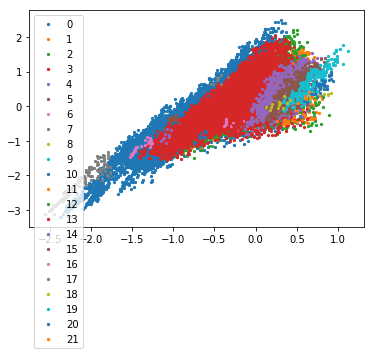

In [255]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
#This census block's Total Pop was in error (Over 9000)
df = df[df['CENSUS BLOCK']!=8435001023]

X = df.drop(columns=['CENSUS BLOCK', 'closest_el',
                     'daily_rides_closest_el', 'best_shops_under_001', 
                     'block_lat', 'block_lon'])
X = StandardScaler().fit_transform(X)

db = db_scan_search(.3,11, X)
labels = db.labels_
df['db_labels'] = db.labels_
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]
labels_for_plot = np.unique(labels)

df['pca_one'] = pca_one
df['pca_two'] = pca_two

for dblabel in labels_for_plot[1:]:
    new_df = df[df.db_labels == dblabel]
    df_pca_one = new_df.pca_one
    df_pca_two = new_df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel)
plt.legend()

In [279]:
df[df.db_labels==21].describe()


,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,7.000000e+00,7.000000,7.000000,7.0,7.000000,7.000000,7.0,7.000000,7.000000,7.0,7.000000,7.0,7.000000,7.000000
mean,4.854148e+09,5.857143,7.285714,0.0,0.013652,2089.343210,0.0,41.883008,-87.702106,1.0,0.005525,21.0,0.651659,0.247309
std,3.363557e+09,9.063270,0.487950,0.0,0.004745,1333.619224,0.0,0.051899,0.038173,0.0,0.000790,0.0,0.086959,0.100958
min,1.604002e+09,0.000000,7.000000,0.0,0.006355,337.524862,0.0,41.834703,-87.745929,1.0,0.004420,21.0,0.515680,0.082074
25%,2.062503e+09,0.000000,7.000000,0.0,0.011210,962.693870,0.0,41.847185,-87.723266,1.0,0.005010,21.0,0.606797,0.192635
50%,3.018022e+09,0.000000,7.000000,0.0,0.013909,2256.840853,0.0,41.851983,-87.711115,1.0,0.005584,21.0,0.647439,0.270515
75%,8.407502e+09,10.500000,7.500000,0.0,0.015938,3272.478661,0.0,41.922266,-87.689577,1.0,0.006186,21.0,0.700551,0.299369
max,8.417001e+09,20.000000,8.000000,0.0,0.021006,3560.691691,0.0,41.955466,-87.632013,1.0,0.006280,21.0,0.783797,0.394563


In [1]:
df[df.db_labels==1].describe()


NameError: name 'df' is not defined

In [292]:
df[df.db_labels==11].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,2.200000e+01,22.000000,22.000000,22.0,22.000000,22.000000,22.0,22.000000,22.000000,22.0,22.000000,22.0,22.000000,22.000000
mean,5.804593e+09,3.500000,4.727273,0.0,0.024588,2191.161526,0.0,41.824992,-87.673068,4.0,0.015048,11.0,0.488346,-0.415733
std,2.369536e+09,6.337718,0.935125,0.0,0.005510,2145.956423,0.0,0.066574,0.033971,0.0,0.001088,0.0,0.138613,0.070332
min,7.070020e+08,0.000000,3.000000,0.0,0.013679,337.524862,0.0,41.707032,-87.752824,4.0,0.012977,11.0,0.263190,-0.515859
25%,3.485507e+09,0.000000,4.000000,0.0,0.022018,1209.550927,0.0,41.780313,-87.685204,4.0,0.014357,11.0,0.359926,-0.473880
50%,6.505001e+09,0.000000,4.500000,0.0,0.024130,1384.259708,0.0,41.801728,-87.668894,4.0,0.015003,11.0,0.464010,-0.420611
75%,7.112002e+09,5.500000,5.750000,0.0,0.029093,2256.840853,0.0,41.869081,-87.645509,4.0,0.015833,11.0,0.611262,-0.369254
max,8.438001e+09,20.000000,6.000000,0.0,0.033015,10624.839242,0.0,41.967430,-87.615529,4.0,0.017749,11.0,0.717353,-0.240444


In [293]:
df[df.db_labels==12].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000
mean,2.707821e+09,9.454545,8.909091,0.0,0.015077,4056.645504,0.0,41.901022,-87.672000,1.0,0.007042,12.0,0.744289,0.094533
std,3.005598e+09,8.948337,0.539360,0.0,0.002887,2408.090827,0.0,0.060822,0.053882,0.0,0.000974,0.0,0.044435,0.108776
min,5.030010e+08,0.000000,8.000000,0.0,0.009278,561.752072,0.0,41.774096,-87.767736,1.0,0.005515,12.0,0.666067,-0.033159
25%,8.130020e+08,0.000000,9.000000,0.0,0.013048,1775.271608,0.0,41.875742,-87.698492,1.0,0.006430,12.0,0.727931,0.021912
50%,1.404005e+09,8.000000,9.000000,0.0,0.015542,5034.332208,0.0,41.899687,-87.670814,1.0,0.006785,12.0,0.736299,0.051276
75%,3.205002e+09,16.500000,9.000000,0.0,0.017060,6014.277848,0.0,41.944016,-87.618804,1.0,0.007600,12.0,0.762717,0.170859
max,8.417001e+09,22.000000,10.000000,0.0,0.018745,6600.007061,0.0,41.970596,-87.606038,1.0,0.009026,12.0,0.820691,0.269769


In [299]:
df[df.db_labels==18].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,1.200000e+01,12.000000,12.000000,12.0,12.000000,12.000000,12.0,12.000000,12.000000,12.0,12.000000,12.0,12.000000,12.000000
mean,4.977756e+09,11.166667,7.166667,0.0,0.035089,2515.757457,0.0,41.864220,-87.697386,0.0,0.004364,18.0,0.275644,0.051863
std,2.797183e+09,10.417061,0.717741,0.0,0.003611,1857.254765,0.0,0.075889,0.055914,0.0,0.000940,0.0,0.086731,0.118202
min,1.201003e+09,0.000000,6.000000,0.0,0.031593,695.176471,0.0,41.778699,-87.766019,0.0,0.002483,18.0,0.129045,-0.117046
25%,2.204502e+09,0.000000,7.000000,0.0,0.032151,1101.024214,0.0,41.817317,-87.742650,0.0,0.003998,18.0,0.198924,-0.037347
50%,5.805013e+09,13.000000,7.000000,0.0,0.033983,2256.840853,0.0,41.829827,-87.704092,0.0,0.004299,18.0,0.283567,0.052891
75%,7.053002e+09,18.250000,8.000000,0.0,0.037835,3049.767799,0.0,41.916741,-87.649839,0.0,0.004940,18.0,0.335383,0.103965
max,8.399002e+09,28.000000,8.000000,0.0,0.041359,5428.548635,0.0,41.998021,-87.585744,0.0,0.005732,18.0,0.413789,0.305181


In [302]:
df[df.db_labels==21].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
count,7.000000e+00,7.000000,7.000000,7.0,7.000000,7.000000,7.0,7.000000,7.000000,7.0,7.000000,7.0,7.000000,7.000000
mean,4.854148e+09,5.857143,7.285714,0.0,0.013652,2089.343210,0.0,41.883008,-87.702106,1.0,0.005525,21.0,0.651659,0.247309
std,3.363557e+09,9.063270,0.487950,0.0,0.004745,1333.619224,0.0,0.051899,0.038173,0.0,0.000790,0.0,0.086959,0.100958
min,1.604002e+09,0.000000,7.000000,0.0,0.006355,337.524862,0.0,41.834703,-87.745929,1.0,0.004420,21.0,0.515680,0.082074
25%,2.062503e+09,0.000000,7.000000,0.0,0.011210,962.693870,0.0,41.847185,-87.723266,1.0,0.005010,21.0,0.606797,0.192635
50%,3.018022e+09,0.000000,7.000000,0.0,0.013909,2256.840853,0.0,41.851983,-87.711115,1.0,0.005584,21.0,0.647439,0.270515
75%,8.407502e+09,10.500000,7.500000,0.0,0.015938,3272.478661,0.0,41.922266,-87.689577,1.0,0.006186,21.0,0.700551,0.299369
max,8.417001e+09,20.000000,8.000000,0.0,0.021006,3560.691691,0.0,41.955466,-87.632013,1.0,0.006280,21.0,0.783797,0.394563


In [307]:
df_high_bus = df[(df.db_labels==8) | 
                (df.db_labels==11) |
                (df.db_labels==12) |
                (df.db_labels==18) |
                (df.db_labels==21)]

In [309]:
df_high_bus.to_csv('data/db_epsp3_25_highbus.csv')

## Drop Business

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.3 20
[ 8817 18205  2394  4990  9679  1118   583   211    52    33    31    32
    79    20    21    25]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


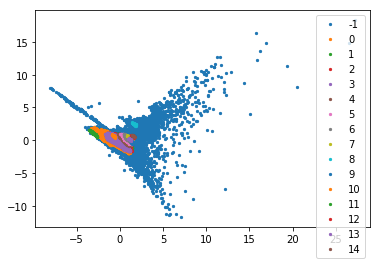

In [12]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
#This census block's Total Pop was in error (Over 9000)
df = df[df['CENSUS BLOCK']!=8435001023]

X = df.drop(columns=['CENSUS BLOCK', 'closest_el',
                     'daily_rides_closest_el', 'best_shops_under_001', 
                     'block_lat', 'block_lon', 'bus_within_001'])
X = StandardScaler().fit_transform(X)

db = db_scan_search(.3,20, X)
labels = db.labels_
df['db_labels'] = db.labels_
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]
labels_for_plot = np.unique(labels)

df['pca_one'] = pca_one
df['pca_two'] = pca_two

for dblabel in labels_for_plot:
    new_df = df[df.db_labels == dblabel]
    df_pca_one = new_df.pca_one
    df_pca_two = new_df.pca_two
    plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel)
plt.legend()

In [11]:
df.head()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,closest_el,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,db_labels,pca_one,pca_two
0,101001000,128,2,0,Jarvis,0.009465,1347.408038,0,42.022564,-87.666316,0,0.022949,0,-0.036452,-0.429857
1,101001001,71,0,0,Jarvis,0.007069,1347.408038,0,42.022424,-87.668571,0,0.020553,0,-0.110000,-0.133734
2,101001002,45,0,0,Jarvis,0.006355,1347.408038,0,42.022033,-87.668894,3,0.019839,1,0.336902,0.299764
3,101001003,335,0,0,Jarvis,0.005944,1347.408038,0,42.021412,-87.668684,0,0.019428,-1,1.019373,-2.240021
4,101002000,152,0,0,Howard,0.005396,5357.830394,0,42.022552,-87.670984,3,0.018267,-1,0.855456,-0.617741
